In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df = pd.read_csv('house price.csv')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.info

<bound method DataFrame.info of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4  

In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sum()

0

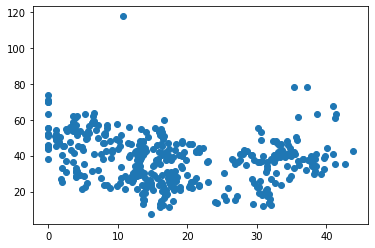

In [ ]:
plt.scatter(df['X2 house age'],df['Y house price of unit area']) 
#no linear relation between age and house price

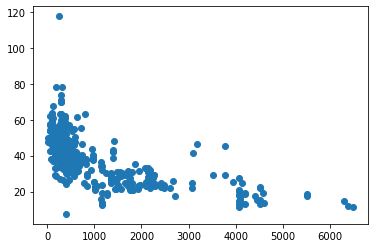

In [ ]:
plt.scatter(df['X3 distance to the nearest MRT station'],df['Y house price of unit area'])  #When didtance betwween mrt station decreases the price increases

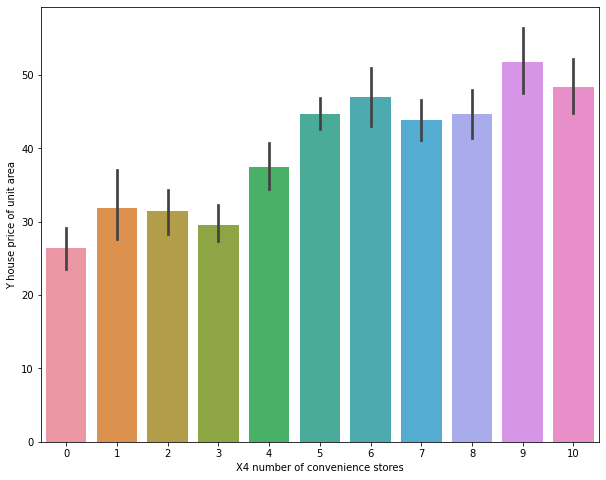

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='X4 number of convenience stores', y='Y house price of unit area')  
# As no. of stores inc the price increases

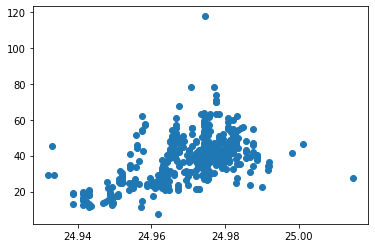

In [ ]:
plt.scatter(df['X5 latitude'],df['Y house price of unit area'])  #Linear relation between latitude and price

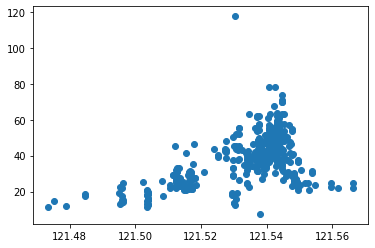

In [ ]:
plt.scatter(df['X6 longitude'],df['Y house price of unit area']) #semi linear relation between longitude and price

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
x=df[['X3 distance to the nearest MRT station']].values
y=df['Y house price of unit area'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.33,random_state=2)

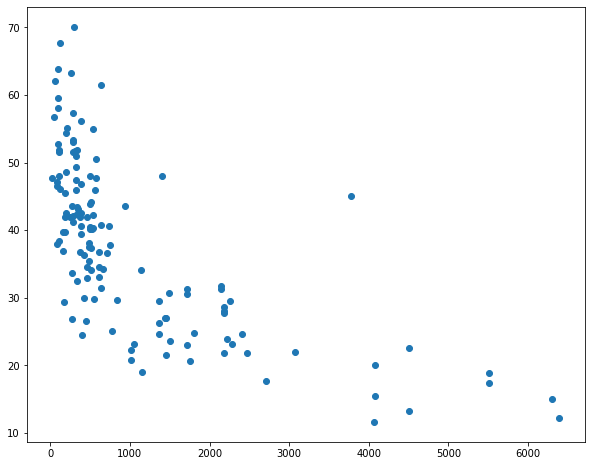

In [ ]:
#plot train data
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train)

In [ ]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

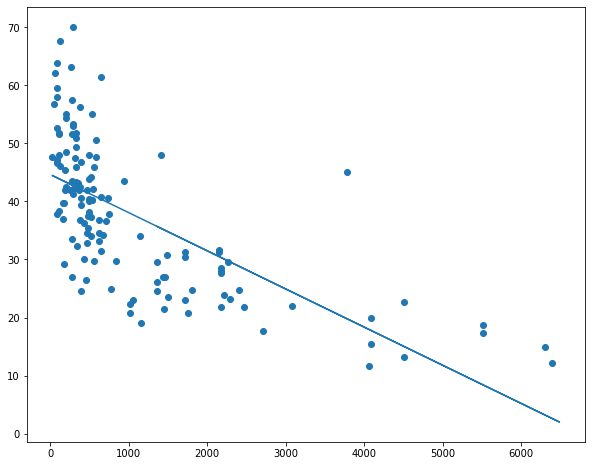

In [ ]:
#plot train data and test data
plt.figure(figsize=(10,8))
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred) #better if used polynomial regression

In [ ]:
#lets check mse and bias ,var error
mean_squared_error(y_pred,y_test) 

109.39536092218674

In [ ]:
#!pip install mlxtend --upgrade

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
#!pip install mlxtend --upgrade

from mlxtend.evaluate import bias_variance_decomp

avg_loss, avg_bias, avg_var = bias_variance_decomp(model, x_train, y_train,x_test,y_test,loss = 'mse', random_seed = 32, num_rounds = 200)
print(avg_loss)
print(avg_bias) #Very high bias
print(avg_var)


896.8588350777272
888.654142171406
8.20469290632156


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:

poly_reg = PolynomialFeatures(degree = 2)

x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.33, random_state = 1)

LR_model_2 = linear_model.LinearRegression()
LR_model_2.fit(x_train,y_train)

y_pred = LR_model_2.predict(x_test)

x_grid = np.arange(min(list(x)), max(x), 0.1)

x_grid = x_grid.reshape(len(x_grid),1)

y_pred_2 = LR_model_2.predict(poly_reg.fit_transform(x_grid))

In [ ]:


avg_loss, avg_bias, avg_var = bias_variance_decomp(LR_model_2, x_train, y_train,x_test,y_test,loss = 'mse', random_seed = 32, num_rounds = 200)
print(avg_loss)
print(avg_bias) #Very high bias
print(avg_var)


# degree 2
#112.77589892199447
#111.96451335674008
#0.8113855652543576


# degree 3
#108.97108908016229
#108.04780497525316
#0.9232841049091575

#degree 4


112.77589892199447
111.96451335674008
0.8113855652543576


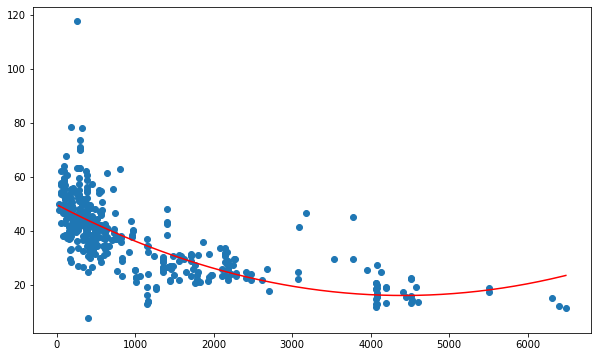

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x_grid,y_pred_2, c='r')